In [247]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [248]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Preprocessing
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# one-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
y_valid = to_categorical(y_valid, 10)

# Flatten input data
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))
x_valid = x_valid.reshape((x_valid.shape[0], -1))

In [249]:
model = Sequential([
    Dense(16, activation='relu', input_dim=x_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(units=10, activation='sigmoid')
])

model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_163 (Dense)           (None, 16)                12560     
                                                                 
 dense_164 (Dense)           (None, 16)                272       
                                                                 
 dense_165 (Dense)           (None, 10)                170       
                                                                 
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [250]:
history = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_valid, y_valid)
)

Epoch 1/20
108/108 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.4379 - val_loss: 0.1863 - val_accuracy: 0.6164
Epoch 2/20
108/108 [==============================] - 0s 1ms/step - loss: 0.1476 - accuracy: 0.7292 - val_loss: 0.1274 - val_accuracy: 0.7756
Epoch 3/20
108/108 [==============================] - 0s 1ms/step - loss: 0.1147 - accuracy: 0.7913 - val_loss: 0.1093 - val_accuracy: 0.7978
Epoch 4/20
108/108 [==============================] - 0s 1ms/step - loss: 0.1013 - accuracy: 0.8135 - val_loss: 0.0968 - val_accuracy: 0.8246
Epoch 5/20
108/108 [==============================] - 0s 1ms/step - loss: 0.0936 - accuracy: 0.8262 - val_loss: 0.0895 - val_accuracy: 0.8336
Epoch 6/20
108/108 [==============================] - 0s 1ms/step - loss: 0.0882 - accuracy: 0.8343 - val_loss: 0.0853 - val_accuracy: 0.8388
Epoch 7/20
108/108 [==============================] - 0s 1ms/step - loss: 0.0842 - accuracy: 0.8405 - val_loss: 0.0820 - val_accuracy: 0.8464
Epoch 

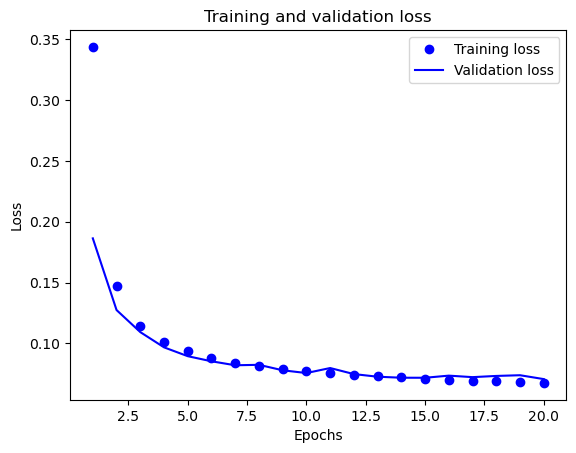

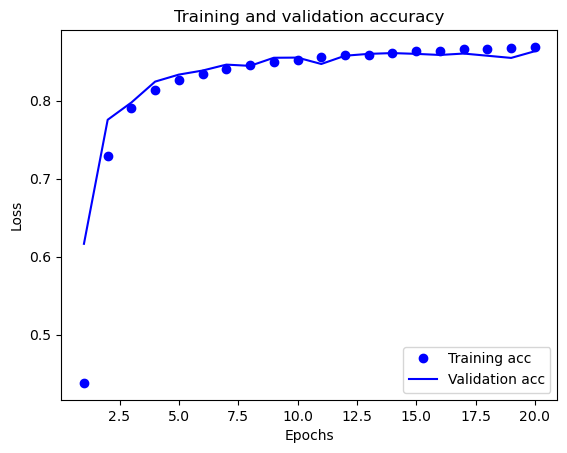

In [251]:
import matplotlib.pyplot as plt


history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [253]:
results = model.evaluate(x_test, y_test)

print('Test Loss:', results[0])
print('Test Accuracy:', results[1])

313/313 [==============================] - 0s 272us/step - loss: 0.0761 - accuracy: 0.8547
Test Loss: 0.07611029595136642
Test Accuracy: 0.8547000288963318
